# Les équations différentielles d'ordre 1

- <b>Définition</b> : Une équation différentielle du premier ordre est une équation dont l'inconnue est une fonction, et où intervient la dérivée de cette fonction. 
- <b>Rôle</b> : Trouver une ou un intervalle de solutions à une équation donnée. 
- <b>Intérêt</b> : En statistiques, en finances , en électricité, chimie et biologie.



## Introduction:
Ce notebook va donc répertorier les cas d'utilisation des équations différentielles les plus connus, avec un <b>vocabulaire le plus simpliste possible. On les résouds avec Python</b>


!! ATTENTION DOCUMENT EN COURS DE CREATION EN JUIN 2023, CA VA ETRE ASSEZ LONG A FAIRE,  JE TRIERAIS LES MEILLEURS EXEMPLES TROUVES SUR INTERNET ENSUITE POUR LINSTANT JE LES METS A LA SUITE , JE VAIS BIEN ANNOTER LES VARIABLES ET LEURS SENS POUR QU ON PUISSE RESOUDRE DES PROBLEMES SANS THEORIE ET LES DERIVER , MAIS EN TANT QUE TECHNICIEN!!

## Sommaire :
- Exemple 1 : Evolution de population
    - Evolution de population de zèbres dans un parc pour animaux
    - Evolution d'une population suite à une maladie
- Exemples 2 : Loi de refroidissement/Réchauffement de Newton 
    - Temps de refroidissement d'une dinde
    - Temps de refroidissement d'un café
- Exemple 4 : Resistance à l'air d'une chute d'un objet.
- Exemple 5 : Evolution d’une somme d’argent rapportant des intérêts, placé à un taux α ;
- Exemple 6 : Le changement de hauteur par jour de l'eau dans un réservoir particulier qui a un trou dans sa base.
- Exemple 7 : La quantité de charge, Q, qui s'écoule chaque seconde d'un condensateur (un dispositif qui stocke la charge).
- Exemple 8 : Le nombre d'atomes radioactifs qui émettent un rayonnement chaque seconde.
- Exemple 9 : Désintégration Radio-Active et Datation Carbone
- Exemple 10 : Evolution d'une substance dans le sang


## Exemple 1 : Evolution de population





Démontrons une simulation où nous commençons avec 100 animaux, 
un taux de croissance net de 10 % (0,1) par unité de temps, qui peut être d'un mois, et t∈[0,20] mois. 

Nous pouvons d'abord essayer Δt d'un demi-mois (0,5), ce qui implique Nt=40 (ou pour être absolument précis, le dernier instant à calculer selon notre configuration ci-dessus est tNt+1=20,5). 

La figure Evolution d'une population calculée au pas de temps 0,5 mois montre les résultats. La ligne continue est la solution exacte, tandis que les cercles sont la solution numérique calculée. 

L'écart est bien visible. Et si nous rendions Δt 10 fois plus petit ? Le résultat est affiché dans la figure Évolution d'une population calculée avec un pas de temps de 0,05 mois, où nous utilisons maintenant une ligne continue également pour la solution numérique (sinon, 400 cercles auraient l'air très encombrés, donc le programme a un test sur la façon d'afficher le solution numérique, sous forme de cercles ou de ligne continue). 

Nous pouvons difficilement distinguer la solution exacte et la solution numérique. Le temps de calcul est également d'une fraction de seconde sur un ordinateur portable, il apparaît donc que la méthode Forward Euler est suffisamment précise à des fins pratiques. 

(Ce n'est pas toujours vrai pour les grands modèles de simulation compliqués en ingénierie, donc des méthodes plus sophistiquées peuvent être nécessaires.)

4.2 Population Growth and Decay

dN(t)/dt =kN(t)

where N(t) denotes population at time t and k is a constant of proportionality, serves as a model for population


Voici les 3 méthodes de calcul apparentées sur ce sujet : 

<img src ="img/logisitcornot.png"></img>


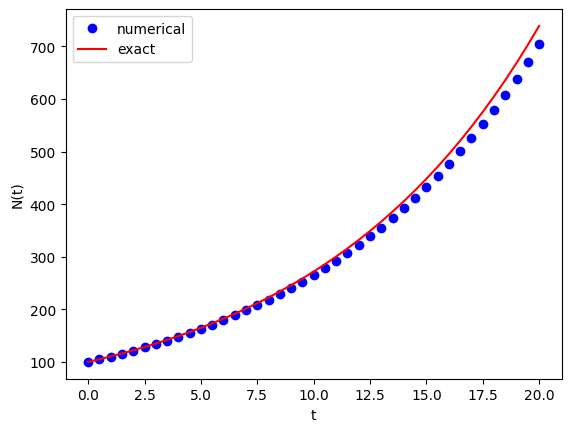

In [30]:
# N_0 = input('Give initial population size N_0: ')
# r   = input('Give net growth rate r: ')
# dt  = input('Give time step size: ')
# N_t = input('Give number of steps: ')

from numpy import linspace, zeros, exp

N_0 = 100 # Population initiale
r   = 0.1 # Croissance de la population en %
dt  = 0.5 # Echelle de temps
N_t = 40 # Nombre de pas


t = linspace(0, N_t*dt, N_t+1)
N = zeros(N_t+1)

N[0] = N_0
for n in range(N_t):
    N[n+1] = N[n] + r*dt*N[n]

import matplotlib.pyplot as plt

numerical_sol = 'bo' if N_t < 70 else 'b-'
plt.plot(t, N, numerical_sol, t, N_0*exp(r*t), 'r-')
plt.legend(['numerical', 'exact'], loc='upper left')
plt.xlabel('t'); plt.ylabel('N(t)')
filestem = 'img/growth1_%dsteps' % N_t
plt.savefig('%s.png' % filestem); plt.savefig('%s.pdf' % filestem)




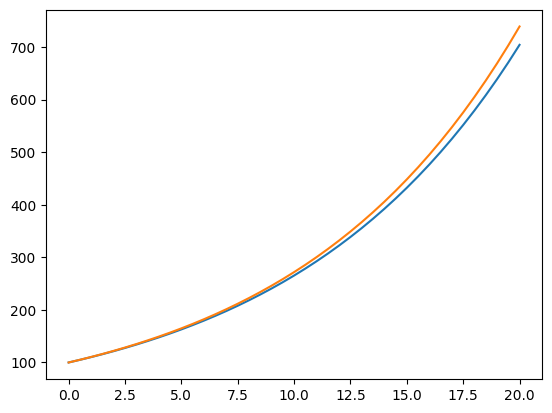

In [31]:
from numpy import linspace, zeros, exp
import matplotlib.pyplot as plt

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    u = zeros(N_t+1)
    t = linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f(u[n], t[n])
    return u, t

def demo_population_growth():
    """Test case: u'=r*u, u(0)=100."""
    def f(u, t):
        return 0.1*u

    u, t = ode_FE(f=f, U_0=100, dt=0.5, T=20)
    plt.plot(t, u, t, 100*exp(0.1*t))
    plt.show()

if __name__ == '__main__':
    demo_population_growth()

## Evolution de population de zèbres dans un parc pour animaux

- https://caam37830.github.io/book/04_functions/ode_initial.html

Vos zèbres continuent d'avoir des bébés. C'est gérable pour l'instant, et les bébés zèbres sont mignons. Cependant, vous êtes un peu inquiet du nombre de zebres que vous devrez nourrir et vous voulez comprendre ce qui se passera si vous laissez les choses aller sans contrôle. Naturellement, vous décidez d'écrire un programme pour simuler votre problème de zèbre.

Disons que vous avez Z0 zèbres ce mois-ci. Le nombre de bébés zèbres qui apparaîtront le mois prochain est proportionnel à la population actuelle.

Il est maintenant temps de lancer votre interpréteur Python. Nous utiliserons solve_ivp dans scipy.integrate - il s'agit d'un wrapper de haut niveau avec de nombreuses options pour résoudre les problèmes de valeur initiale. Les arguments importants à fournir sont :

    f(t, y) - une fonction Python qui renvoie le côté droit de l'ODE - cela peut être une fonction à valeurs multiples

    t_span - un tuple (t0, t1) qui donne les heures de début et de fin de la simulation

    z0 - l'état du système à t0




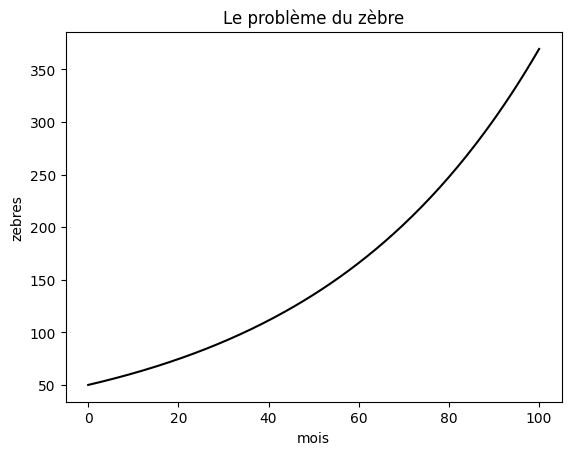

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Etat du système à t0  = Nombre de zèbres à t0
z0 = np.array([50])
alpha = 0.02

f = lambda t, z : alpha * z

# Timespan = intervalle de temps étudiée
t_span = (0, 100)
t_eval = np.linspace(0,100, 200)

sol = solve_ivp(f, t_span, z0, t_eval=t_eval)
    
plt.plot(sol.t, sol.y[0], c='k')
plt.title("Le problème du zèbre")
plt.ylabel("zebres")
plt.xlabel("mois")
plt.show()

# Evolution de population - Expansion de maladie

Chris Hall
Studied at THE UNIVERSITY OF LONDON Upvoted by Thierry Kauffmann, PhD Physics (1996)Author 

Prenons un exemple.
Imaginez une île déserte où un virus mortel s'installe.
Chaque jour, un dixième de la population meurt.
On pourrait dire que :
Nombre de décès par jour = 0,1 x population
Écrivons maintenant ceci en utilisant des symboles mathématiques :

- dN / dt = 0.1 x N
oû :
dN / dt = Nombre de décès par jour

Le signe négatif nous indique que les personnes qui meurent diminuent la population (c'est un changement négatif)

N = Population

QU'ARRIVERA-T-IL À LA POPULATION, N ?

La population, N, diminuera évidemment chaque jour.
Cela signifie que le nombre de personnes qui meurent chaque jour diminuera également.

Par exemple:
Au jour zéro la population est de 10 000 et puis le virus arrive
Le premier jour, la population commence à 10 000, donc 1 000 meurent
Le deuxième jour, la population commence à 9000 donc 900 meurent
Le troisième jour, la population commence à 8100 donc 810 meurent
et ainsi de suite.

PUIS-JE DÉTERMINER COMBIEN DE PERSONNES SERONT EN VIE APRÈS 12 JOURS ?

Eh bien, vous pouvez vous en sortir comme je l'ai fait ci-dessus pendant trois jours, mais continuez jusqu'au jour 12.

Mais ce serait un peu fastidieux.
Donc, un moyen plus rapide est de regarder à nouveau notre équation.

C'est ici:
- dN / dt = 0.1 x N

Ce type d'équation s'appelle une équation différentielle.
La bonne chose à propos des équations différentielles est que nous pouvons les écrire d'une manière différente.
Nous pouvons donc écrire n'importe quelle équation différentielle d'une manière totalement différente.
Lorsque nous faisons cela, nous disons que nous allons "résoudre l'équation différentielle".

Si l'on résouds: - dN / dt = 0.1 x N

On obtient:
N = n x e^-0.1xt

n= la population de départ (au jour zéro)
e = 2,71 (il s'agit d'un nombre important en mathématiques et en physique appelé la constante exponentielle)
t = le nombre de jours qui m'intéressent
N = la population après t jours.

Donc, après 12 jours:

N = n x e^-0.1xt
N = 10 000 x e^-0.1x12
N = 10 000 x e^-1.2

Si vous utilisez votre calculatrice scientifique pour calculer e^-1,2 vous obtiendrez 0,30

Donc: N = 10 000 x 0.30

N = 3000

Après 12 jours, la population sera de 3000.

# Exemple 2 : 
# La loi de refroidissement/réchauffement de Newton.

La loi de refroidissement de Newton affirme que le taux de changement de température d'un objet est proportionnel à la différence de température entre l'objet et le milieu environnant :

$$c = \frac{dT}{dt} = -r (T - T_{env})$$


où t est le temps, T est la température de l'objet, Tenv est la température de l'environnement et r est une constante qui caractérise la rapidité avec laquelle la chaleur est transférée entre l'objet et l'environnement.

Lien : https://allendowney.github.io/ModSimPy/chap15.html


<b>Mise en pratique de la loi de refroidissement de Newton avec Python : </b>
Une dinde à 160 degrés est sortie du four dans une pièce à 70 degrés, la température est de 155 degrés après 5 minutes. Quand la température sera-t-elle de 140 degrés ?


In [33]:
from sympy import *

# FIRST STEP: Solve the IVP from Newton's Law of Cooling: dT/dt = k*(T-70),T(0)=160
k,t=symbols('k t')
T=Function('T')
deq=diff(T(t),t)-k*(T(t)-70)
Tsoln=dsolve(deq,T(t),ics={T(0):160})
print('Solution of the ODE is',Tsoln)


Solution of the ODE is Eq(T(t), 90*exp(k*t) + 70)


In [34]:
# SECOND STEP: Use the 5 minute temperature to find k
keqn=Tsoln.rhs.subs(t,5)-155 # NOTE: 'rhs' refers to the right hand side of the equation
ksoln=solve(keqn,k)
print(ksoln) # last (5th) solution is real: remember Python starts counting at ZERO!
print('Using the 5 minute temperature reading,',Tsoln.subs(k,ksoln[4]))

[log(17**(1/5)*2**(4/5)*3**(3/5)/6) - 4*I*pi/5, log(17**(1/5)*2**(4/5)*3**(3/5)/6) - 2*I*pi/5, log(17**(1/5)*2**(4/5)*3**(3/5)/6) + 2*I*pi/5, log(17**(1/5)*2**(4/5)*3**(3/5)/6) + 4*I*pi/5, log(7344**(1/5)/6)]
Using the 5 minute temperature reading, Eq(T(t), 90*exp(t*log(7344**(1/5)/6)) + 70)


In [35]:
# Finally, use the new equation to solve for t when T = 140
Teqn=Tsoln.rhs.subs(k,ksoln[4])
tcooled=solve(Teqn-140,t)
print(tcooled) #only one solution this time...the 0th one
print('The turkey is cool enough to eat after',tcooled[0],'or',tcooled[0].evalf(),'minutes.')

[log((7/9)**(1/log(7344**(1/5)/6)))]
The turkey is cool enough to eat after log((7/9)**(1/log(7344**(1/5)/6))) or 21.9840274945891 minutes.


# Exemple 6 : Le changement de hauteur par jour de l'eau dans un réservoir particulier qui a un trou dans sa base.

- dH / dt = 0,2 H

dH / dt = changement de hauteur d'eau par jour

H = hauteur d'eau dans le réservoir

Vous verrez que la fuite d'eau signifie que la hauteur d'eau dans le réservoir chute d'un cinquième de sa nouvelle hauteur chaque jour.

Remarquez à nouveau le signe négatif car la hauteur diminue.

La solution de cette équation différentielle est :

H = h x e^-0,2 x t

Nous pouvons donc déterminer la hauteur, H, de l'eau t jours après que le réservoir a été plein à une hauteur, h.

Le 0,2 sera un nombre différent pour un réservoir différent car cela dépend de la taille du trou.



# Exemple 7 : La quantité de charge, Q, qui s'écoule chaque seconde d'un condensateur (un dispositif qui stocke la charge).

# - Exemple 8 : Le nombre d'atomes radioactifs qui émettent un rayonnement chaque seconde.

# Exemple 9 : Désintégration Radio-Active et Datation Carbone

a radioactive substance decomposes at a rate proportional to its mass. This rate is called the decay rate. If m(t) represents the mass of a substance at any time, then the decay rate dm/dt is proportional

to m(t). Let us recall that the half-life of a substance is the amount of time for it to decay to one-half of its initial mass.



## 8. Economie  : Le modèle Black Scholes

https://www.codearmo.com/python-tutorial/options-trading-black-scholes-model

# 9. l’ ́evolution d’une somme d’argent rapportant des intérêts, placé à un taux α ;

C:\Users\secretgirl\AppData\Local\Temp\ipykernel_16504\116130296.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


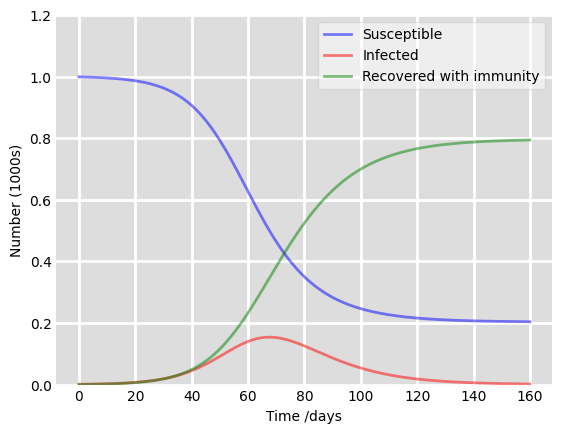

In [36]:
# 10.Modélisation d'une épidémie

# The SIR epidemic model - https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
# https://dridk.me/equation-differentielle.html

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


# Liens:

<b>Odes à faire :</b>
Mixture of Two Salt Solutions
Series Circuits
Prey and Predator
Object falling under air resistance
Harvesting of renewable resources

https://physics.stackexchange.com/questions/104368/free-falling-object-with-air-resistance
https://stackoverflow.com/questions/71542662/python-plotting-free-fall-with-drag
https://scipython.com/book2/chapter-8-scipy/examples/a-projectile-with-air-resistance/

# Les bons liens: 

https://scipython.com/book/chapter-8-scipy/examples/
https://allendowney.github.io/ModSimPy/chap11.html

